In [4]:
%pylab inline
pylab.rcParams['figure.figsize'] = (25, 14)

Populating the interactive namespace from numpy and matplotlib


In [5]:
# Crear un arreglo para x e y, aleatorios de una distribución normal
x_1 = random.normal(80.0, 5.0, 1000)
y_1 = random.normal(20.0, 5.0, 1000)

x_2 = random.normal(10.0, 5.0, 1000)
y_2 = random.normal(70.0, 5.0, 1000)

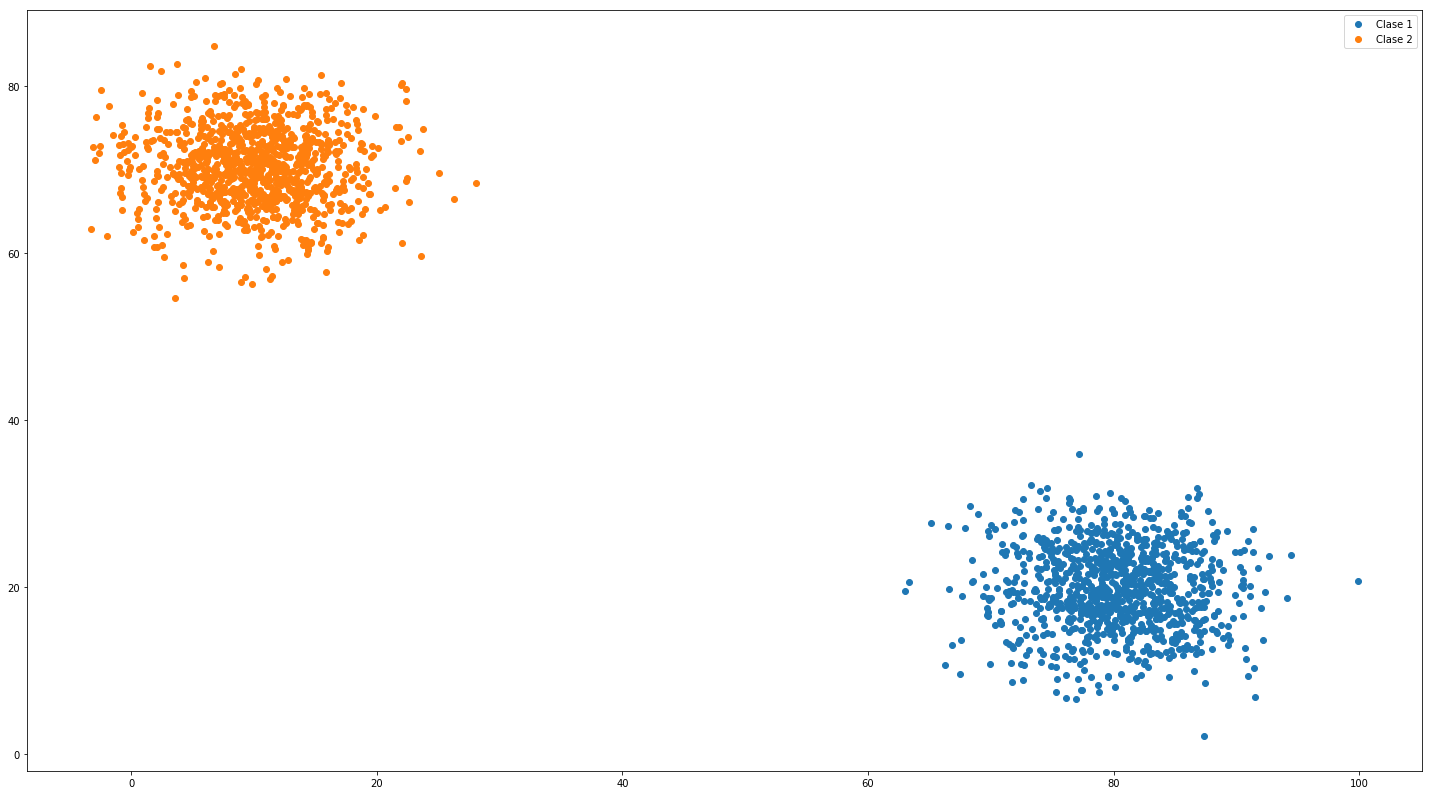

In [6]:
# Grafica estos datos
scatter(x_1, y_1, label="Clase 1")
scatter(x_2, y_2, label="Clase 2")
legend(loc="best")

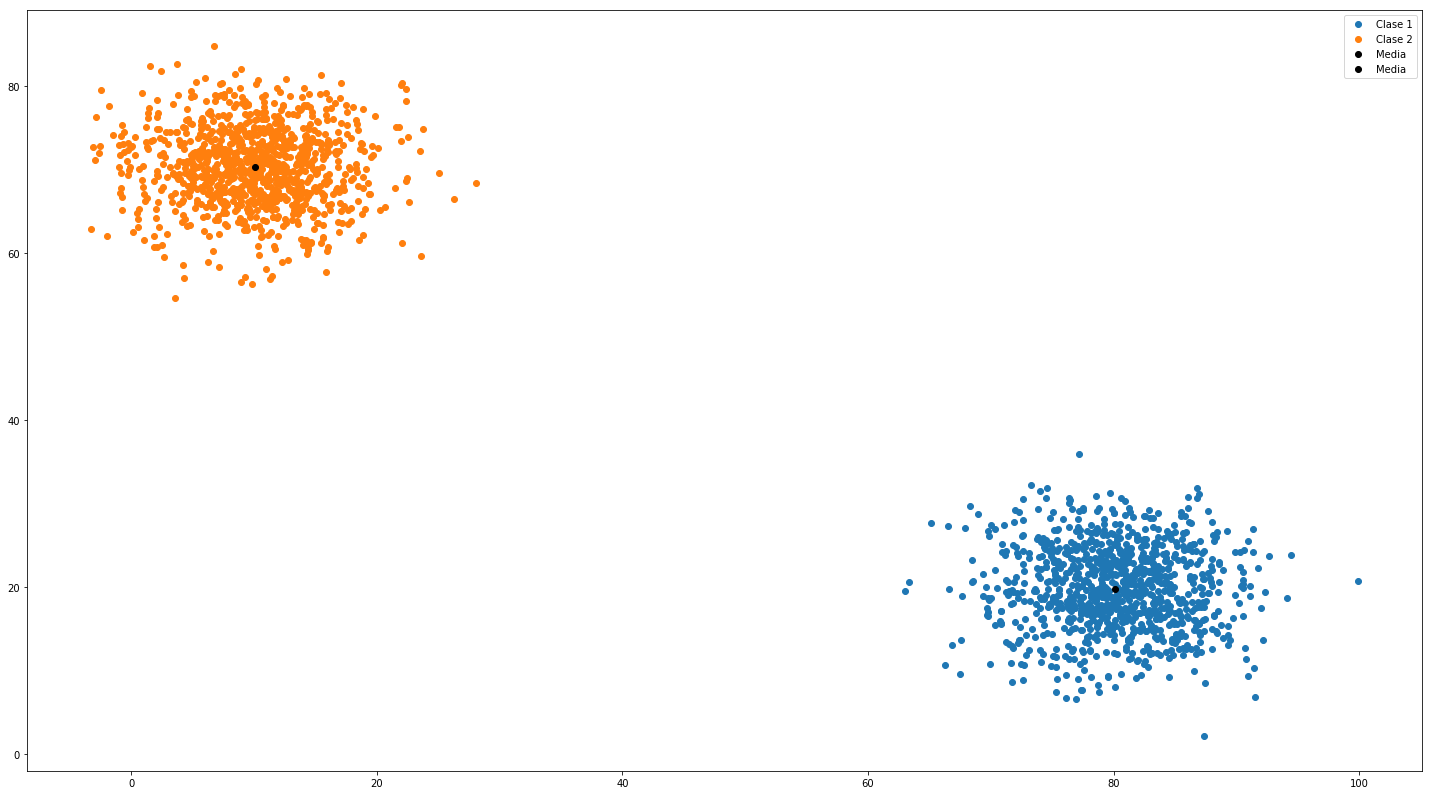

In [7]:
# Medias artiméticas principales
mean_x = [mean(i) for i in list((x_1, x_2))]
mean_y = [mean(i) for i in list((y_1, y_2))]

# Grafica estos datos
scatter(x_1, y_1, label="Clase 1")
scatter(x_2, y_2, label="Clase 2")
for i, j in zip(mean_x, mean_y):
    scatter(i, j, color='black', label="Media")
legend(loc="best")

[45.085938351781714, 45.06217906680895]


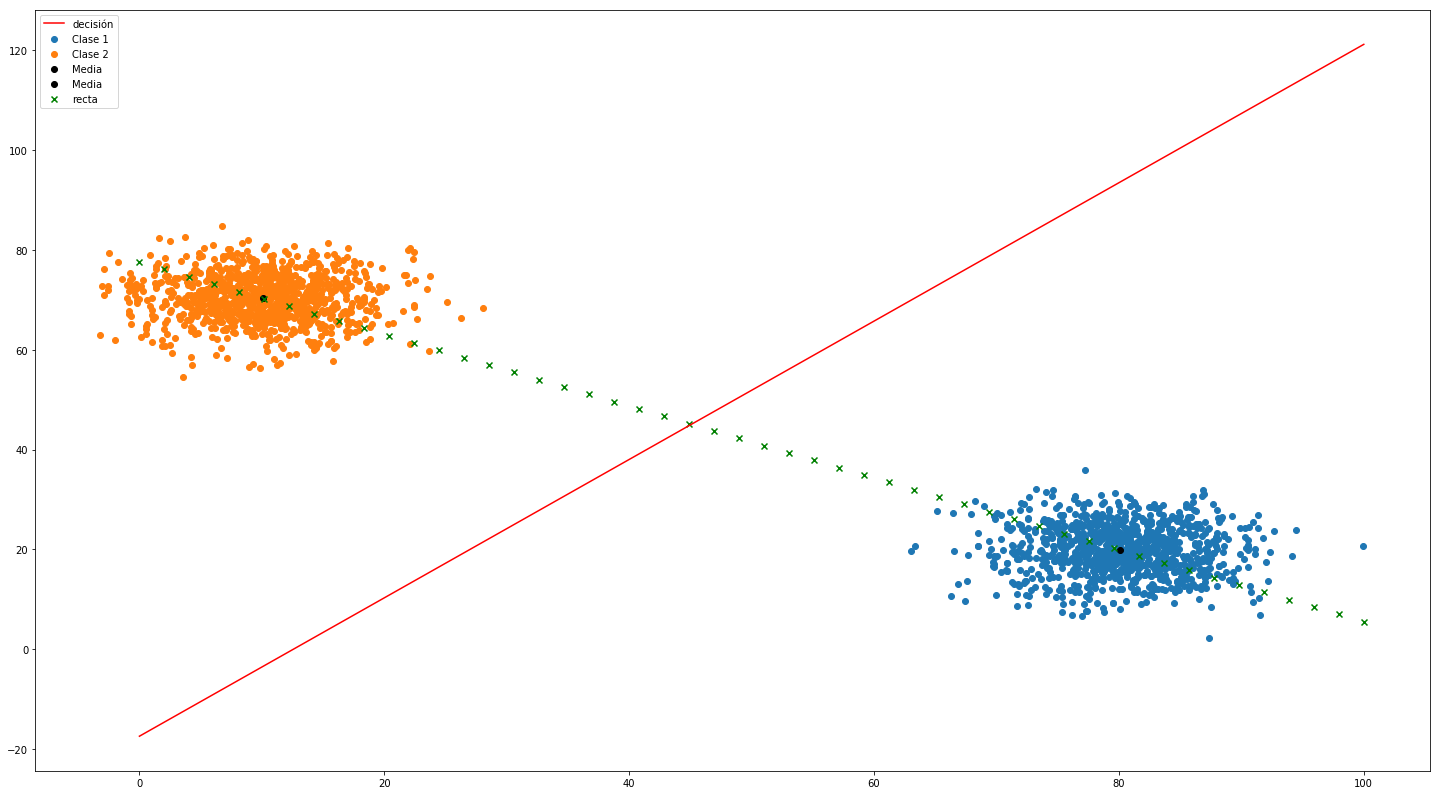

In [8]:
# Calcular la recta que pasa por las medias
pendiente = float(diff(mean_y)) / float(diff(mean_x))
ordenada = mean_y[0] - (pendiente * mean_x[0])

# La ordenada de la recta decisión es el punto intermedio entre la distancia
punto_medio = [sum(i)/2.0 for i in list((mean_x, mean_y))]
ordenada_dec = punto_medio[1] + (punto_medio[0] / pendiente)
print(punto_medio)

# Grafica estos datos
scatter(x_1, y_1, label="Clase 1")
scatter(x_2, y_2, label="Clase 2")
for i, j in zip(mean_x, mean_y):
    scatter(i, j, color='black', label="Media")

x_vals = linspace(0, 100)
scatter(x_vals, pendiente*x_vals + ordenada, label='recta', color='green', marker='x')
plot(x_vals, (-x_vals / pendiente) + ordenada_dec, label='decisión', color='red')
legend(loc="best")

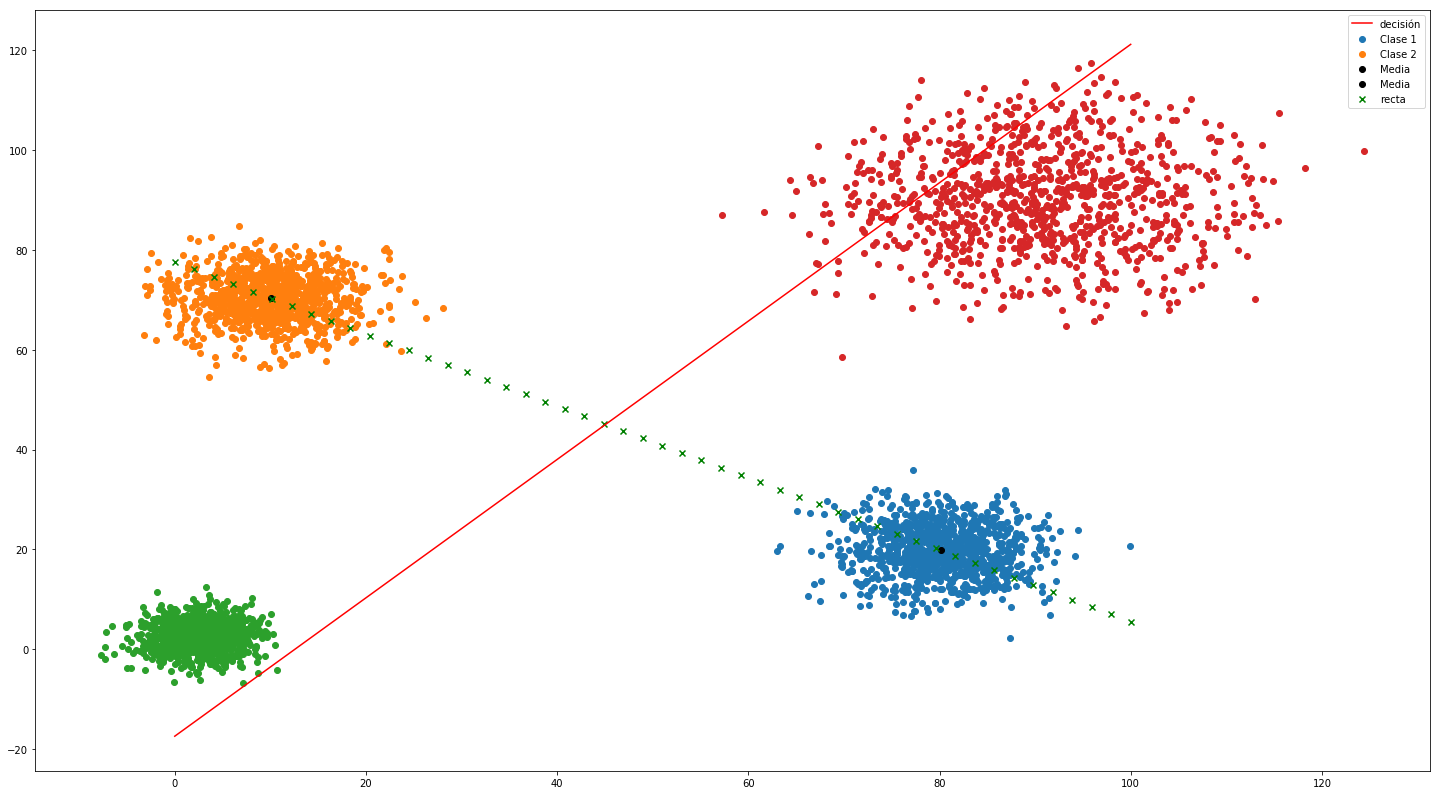

In [9]:
# Se define la nueva función decisión
def decision(x, y):
    dicc_vals = dict()
    lista_clase_1 = list()
    lista_clase_2 = list()
    
    z_transf = [i - (0.5*sum(mean_x)) for i in x]
    w_transf = [i - (0.5*sum(mean_y)) for i in y]
    
    for i, j, k, l in zip(z_transf, w_transf, x, y):
        # print((i*mean_x[0]+j*mean_y[0]) > (i*mean_x[1]+j*mean_y[1]))
        if np.all((i*mean_x[0]+j*mean_y[0]) > (i*mean_x[1]+j*mean_y[1])):
            lista_clase_1.append((k, l))
        else:
            lista_clase_2.append((k, l))
    dicc_vals['clase_1'] = lista_clase_1
    dicc_vals['clase_2'] = lista_clase_2
    return dicc_vals
# Crear algunos arreglos de prueba
array_1 = random.normal(2.5, 3.0, 1000)
array_2 = random.normal(2.5, 3.0, 1000)
array_3 = random.normal(90.0, 10.0, 1000)
array_4 = random.normal(90.0, 10.0, 1000)

# Grafica estos datos
scatter(x_1, y_1, label="Clase 1")
scatter(x_2, y_2, label="Clase 2")
for i, j in zip(mean_x, mean_y):
    scatter(i, j, color='black', label="Media")

x_vals = linspace(0, 100)
scatter(x_vals, pendiente*x_vals + ordenada, label='recta', color='green', marker='x')
plot(x_vals, (-x_vals / pendiente) + ordenada_dec, label='decisión', color='red')
scatter(array_1, array_2)
scatter(array_3, array_4)
legend(loc="best")

In [10]:
# Probar el clasificador, debe dar 'Clase 2'
decision(array_1, array_2)

{'clase_1': [(10.662635675249156, -4.1081331789107125)],
 'clase_2': [(2.545213972269736, 2.3072762535808735),
  (8.400321804237759, -1.0087737995866801),
  (-2.0495888098934874, 5.189003653603023),
  (6.113874261319354, 4.023029938853612),
  (3.8022947490876646, 0.8598920295740762),
  (-1.7777296651121537, 2.2706718331877918),
  (2.0420798394144577, 4.300529290545105),
  (4.470962746105842, 4.320517227644542),
  (4.259830576810103, 6.482669971653149),
  (-0.28633003585281624, -0.32262707401345647),
  (4.219101621704609, 1.0922637835808664),
  (-2.92123601266994, 6.8199720246243425),
  (4.300835664484675, -2.2773332396515595),
  (0.6477140853386263, -3.848725394925264),
  (8.273538587611451, 5.487833654279376),
  (4.4202406000258385, 0.16807625148654415),
  (6.497670918601557, 6.255431695400586),
  (3.3205305262850953, 5.651125090887808),
  (3.201992346589644, 3.6181165534007693),
  (3.539495721266559, 3.9419852577654093),
  (2.729619125184634, 8.717569394836735),
  (1.6887673273776393

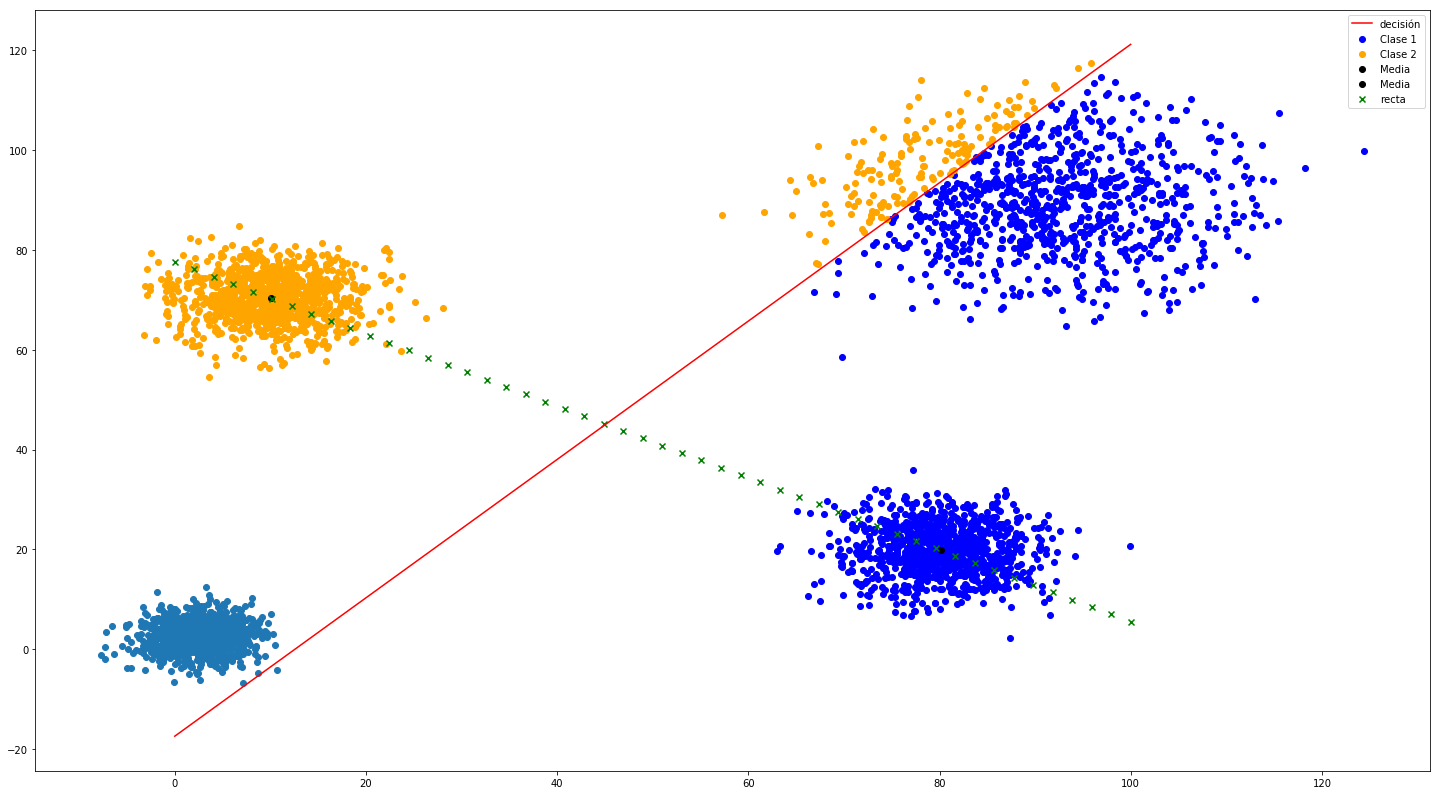

In [11]:
# Mostrar los demás datos y los resultados finales
# Grafica estos datos
scatter(x_1, y_1, label="Clase 1", color='blue')
scatter(x_2, y_2, label="Clase 2", color='orange')
for i, j in zip(mean_x, mean_y):
    scatter(i, j, color='black', label="Media")

x_vals = linspace(0, 100)
scatter(x_vals, pendiente*x_vals + ordenada, label='recta', color='green', marker='x')
plot(x_vals, (-x_vals / pendiente) + ordenada_dec, label='decisión', color='red')
scatter(array_1, array_2)
legend(loc="best")

# Deben haber dos clases en este ejemplo
clases = decision(array_3, array_4)
for k, i in clases.items():
    if k == 'clase_1':
        scatter(*zip(*i), color='blue')
    else:
        scatter(*zip(*i), color='orange')

## Implementación de la matriz de confusión

Esta matriz de confusión tendrá el siguiente formato:

|  Actual/ Predicción | Clase 1 | Clase 2 |
|:-------------------:|:-------:|:-------:|
|       Clase 1       |         |         |
|       Clase 2       |         |         |

In [19]:
# Crear la matriz de confusión, vacía
matriz_conf = zeros((2, 2))

# Los valores actuales son los de entrenamiento
matriz_conf[0][0] = len(x_1)
matriz_conf[1][1] = len(x_2)
print(matriz_conf)

[[1000.    0.]
 [   0. 1000.]]


In [15]:
# Iterar sobre los valores encontrados para el primer conjunto
for k, v in decision(array_1, array_2).items():
    if k == 'clase_1':
        matriz_conf[0][0] += len(v)
    else:
        matriz_conf[0][1] += len(v)
        
# Para el segundo conjunto
for k, v in clases.items():
    if k == 'clase_1':
        matriz_conf[1][0] += len(v)
    else:
        matriz_conf[1][1] += len(v)
        
# Imprimir la matriz resultante
print(matriz_conf)

[[1001.  999.]
 [ 835. 1165.]]


In [20]:
# Estudiar algunos valores, como la sensibilidad y la precisión
tpr = matriz_conf[0][0] / (matriz_conf[0][0] + matriz_conf[0][1])
tnr = matriz_conf[1][1] / (matriz_conf[1][1] + matriz_conf[1][0])
print(f'TPR = {tpr}')
print(f'TNR = {tnr}')

TPR = 1.0
TNR = 1.0


Según esta forma del clasificador, el clasificador es muy bueno, pero hay cosas que se deben revisar como el criterio para aceptar o no en el borde de la recta.